In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('data.csv')

In [43]:
data.sample(10)

,Id,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
88,88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
163,163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
86,86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
165,165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
226,226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
179,179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
78,78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
240,240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
30,30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
296,296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [44]:
data.drop(columns='Id', inplace=True)
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
data.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

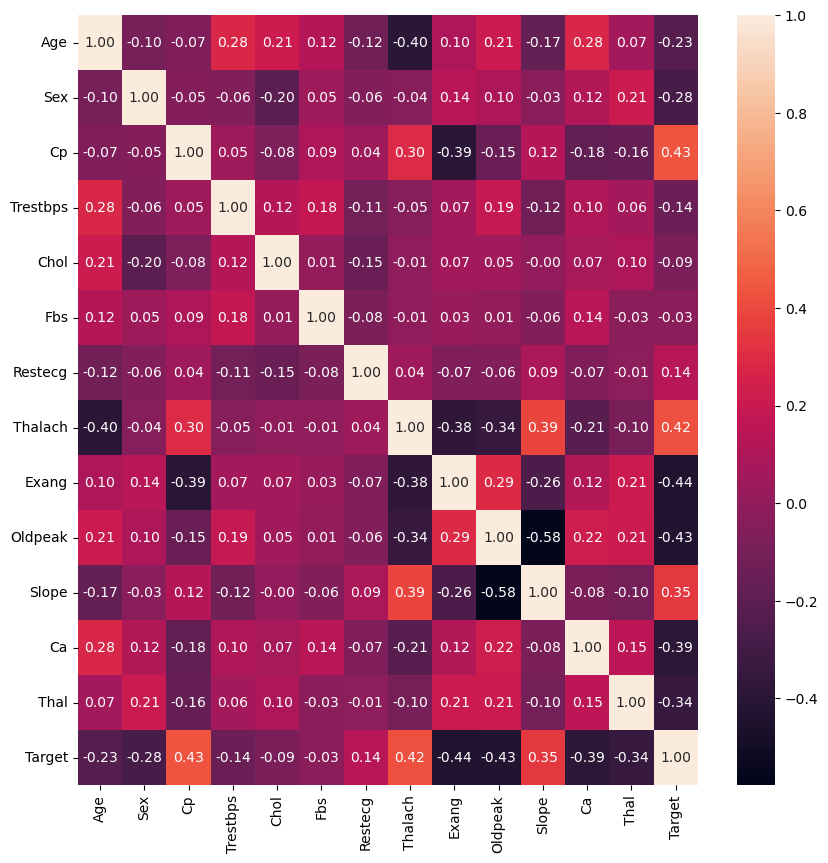

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

## UniVariate Analysis
1. Age
2. Sex


In [47]:
data.Age.value_counts()[:10] # top 10 most frequent age only

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: Age, dtype: int64

<AxesSubplot:>

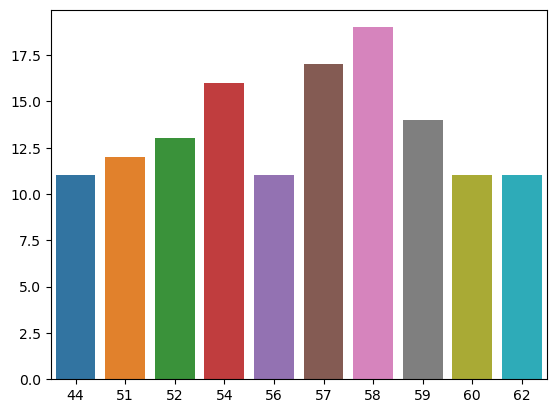

In [48]:
sns.barplot(x=data.Age.value_counts()[:10].index, y=data.Age.value_counts()[:10].values)

Let's divide age into four section of young==0, middle-aged==1, old==2

In [49]:
data['AgeBand'] = 0
data.loc[(data.Age>=29) & (data.Age<40), "AgeBand" ] = 0
data.loc[(data.Age>=40)&(data.Age<55), "AgeBand" ] = 1
data.loc[(data.Age>=55), "AgeBand" ] = 2
    
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeBand
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


<AxesSubplot:xlabel='AgeBand', ylabel='Age'>

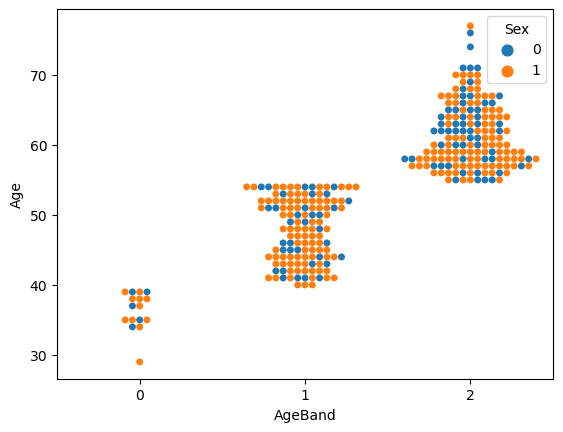

In [53]:
sns.swarmplot(y='Age', x='AgeBand', data=data, hue='Sex')